In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
from mle_toolbox import load_result_logs, visualize
from neuroevobench.postprocess import filter_log
from neuroevobench.postprocess import plot_task, plot_sensitivity

import sys
sys.path.append('../')

import seaborn as sns

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


envpool not installed, Atari problems will not work.
envpool not installed, Atari problems will not work.
You need to install brax for Brax tasks:
  pip install git+https://github.com/google/brax.git@main


In [2]:
strategy_names = ['OpenES', 'PGPE', 'ARS', 'SNES', 'Sep_CMA_ES',
                  'SAMR_GA', 'GESMR_GA']
color_palette = sns.color_palette(
            "colorblind", n_colors=len(strategy_names)
        )
colors = dict(zip(strategy_names, color_palette))

metric = "test_eval_perf"

# Load Hyper & Meta-Log

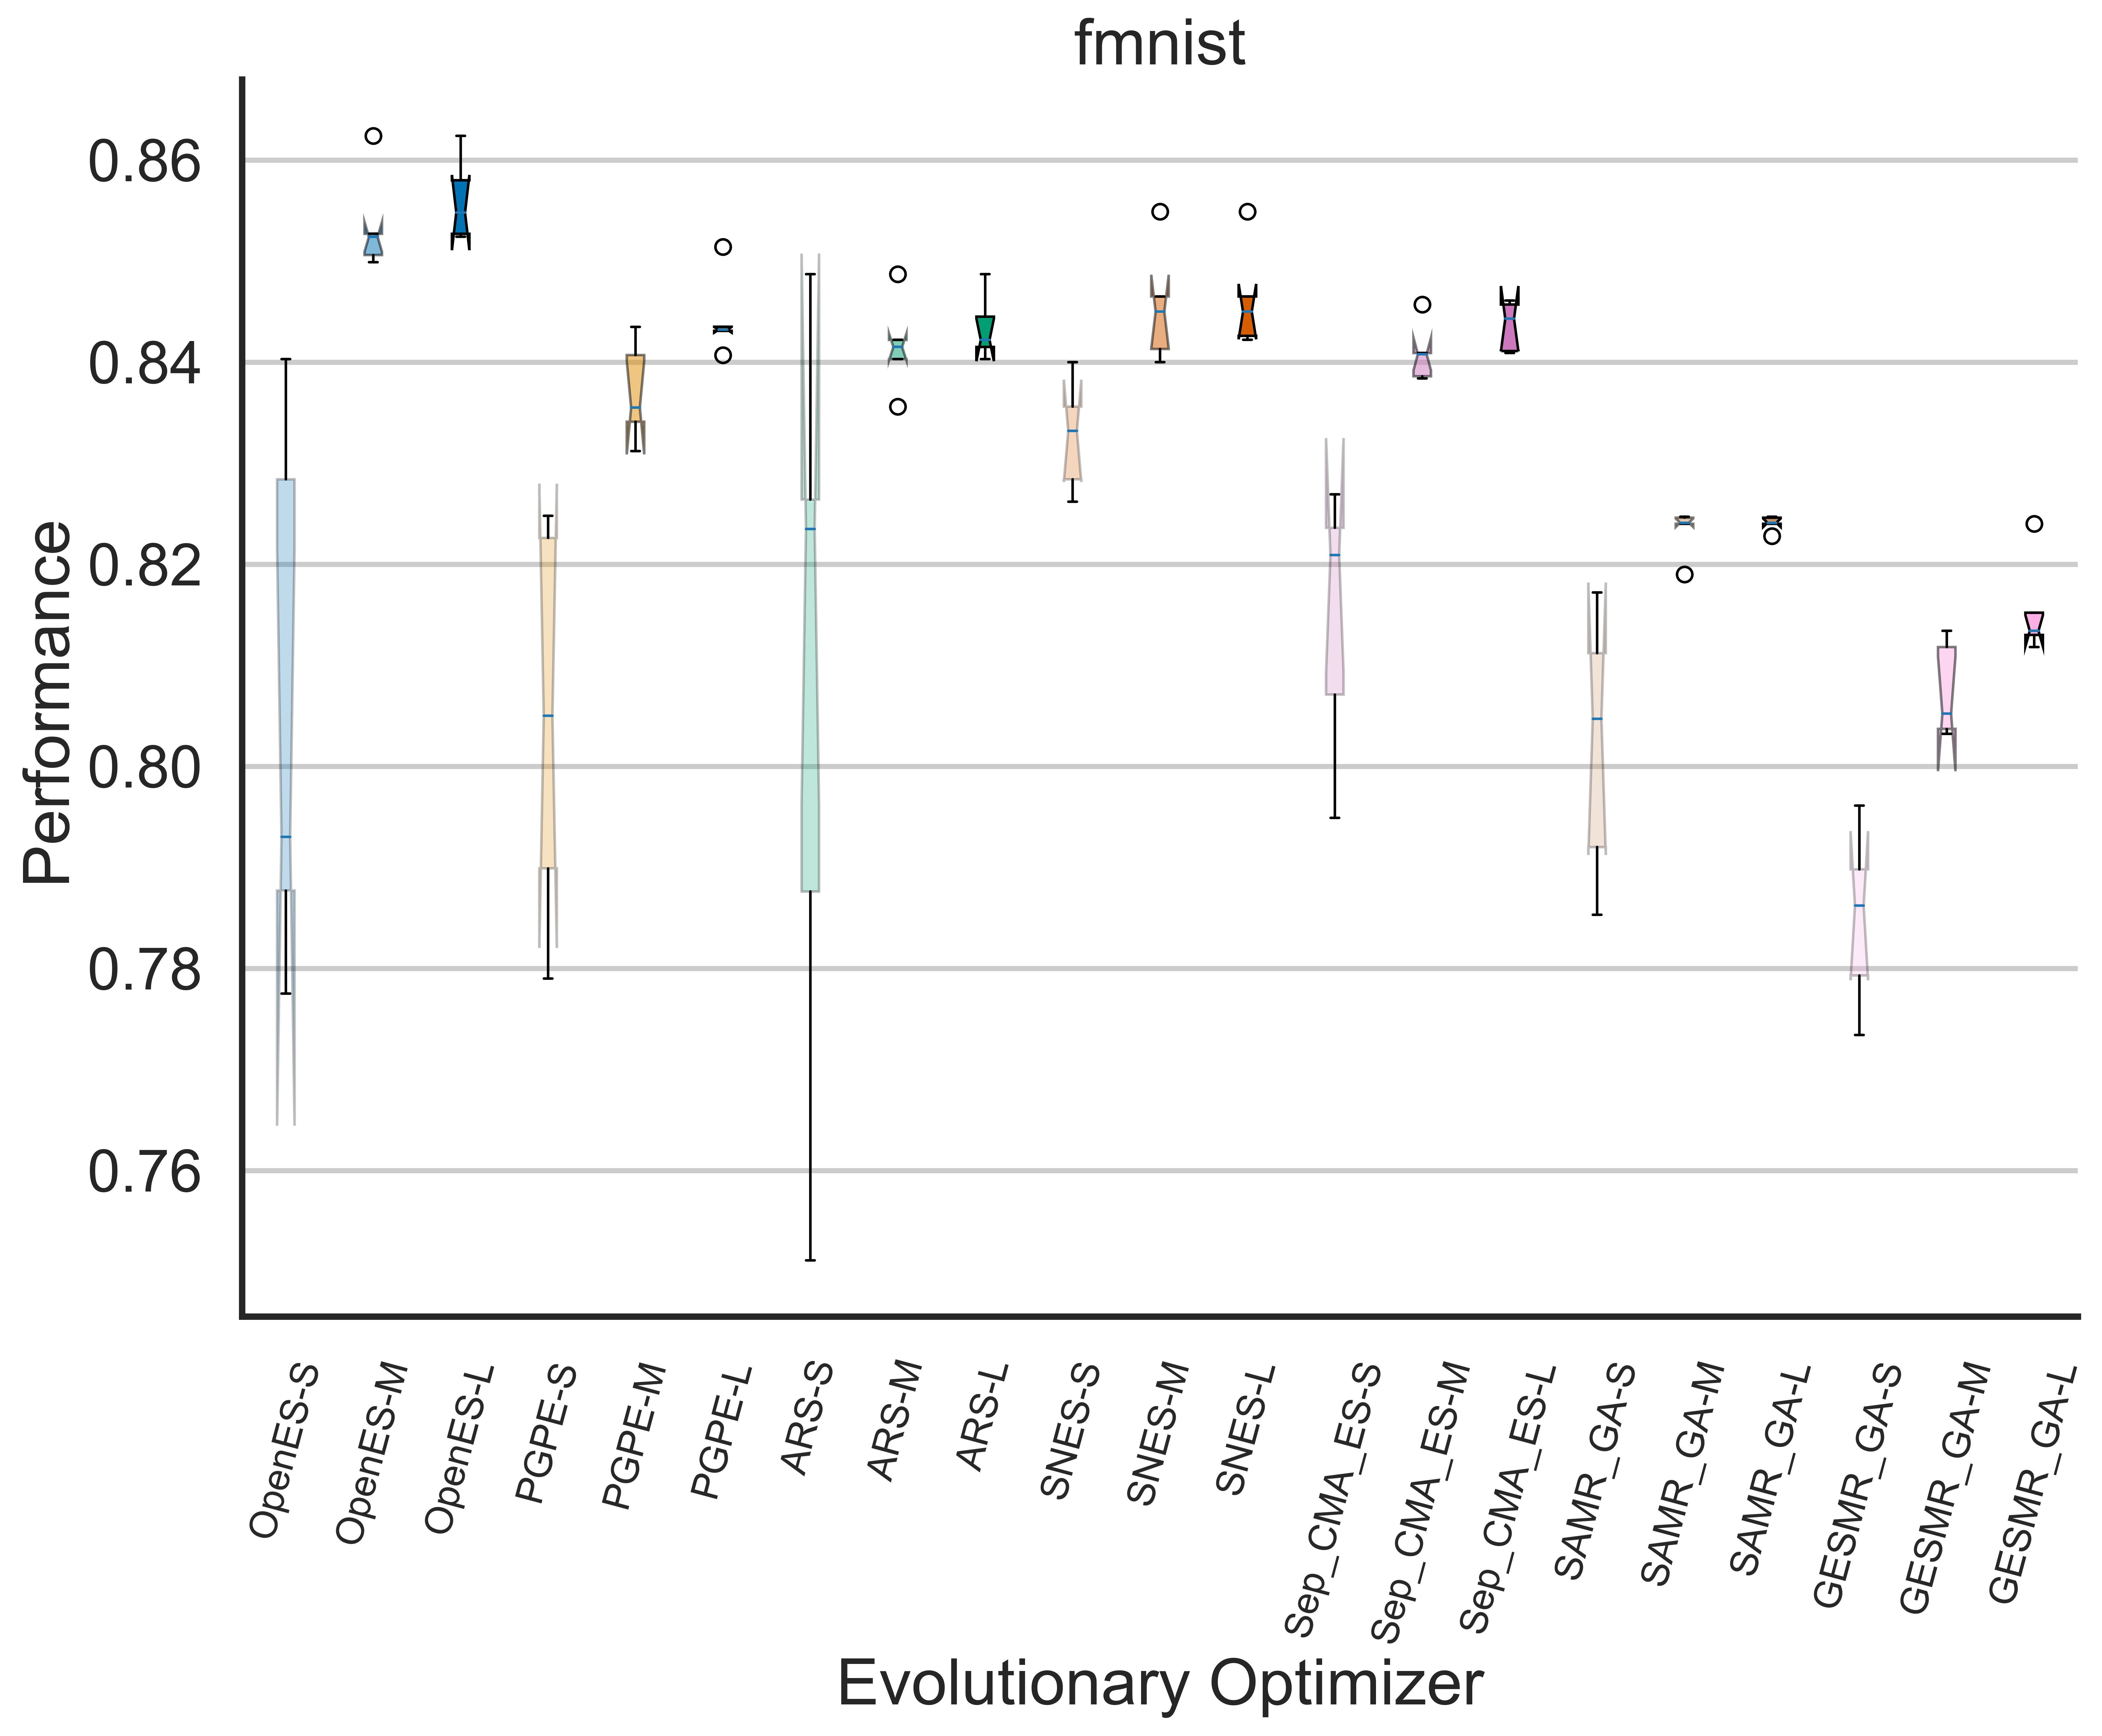

In [5]:
meta_log, hyper_log = load_result_logs("../experiments/search/fmnist_classify")
fig, axs = plt.subplots(1, 1, figsize=(12, 10))
env_name = "fmnist"

env_results = {}
for strategy in strategy_names:
    env_results[strategy] = filter_log(hyper_log, meta_log,
                                       env_name, strategy, metric)

plot_sensitivity(env_results, fig, axs,
                 title=env_name,
                 plot_ylabel=True,
                 plot_xlabel=True,
                 colors=colors,
                 top_k=5)
fig.tight_layout()

/Users/rob/anaconda3/envs/mle-toolbox/lib/python3.9/site-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


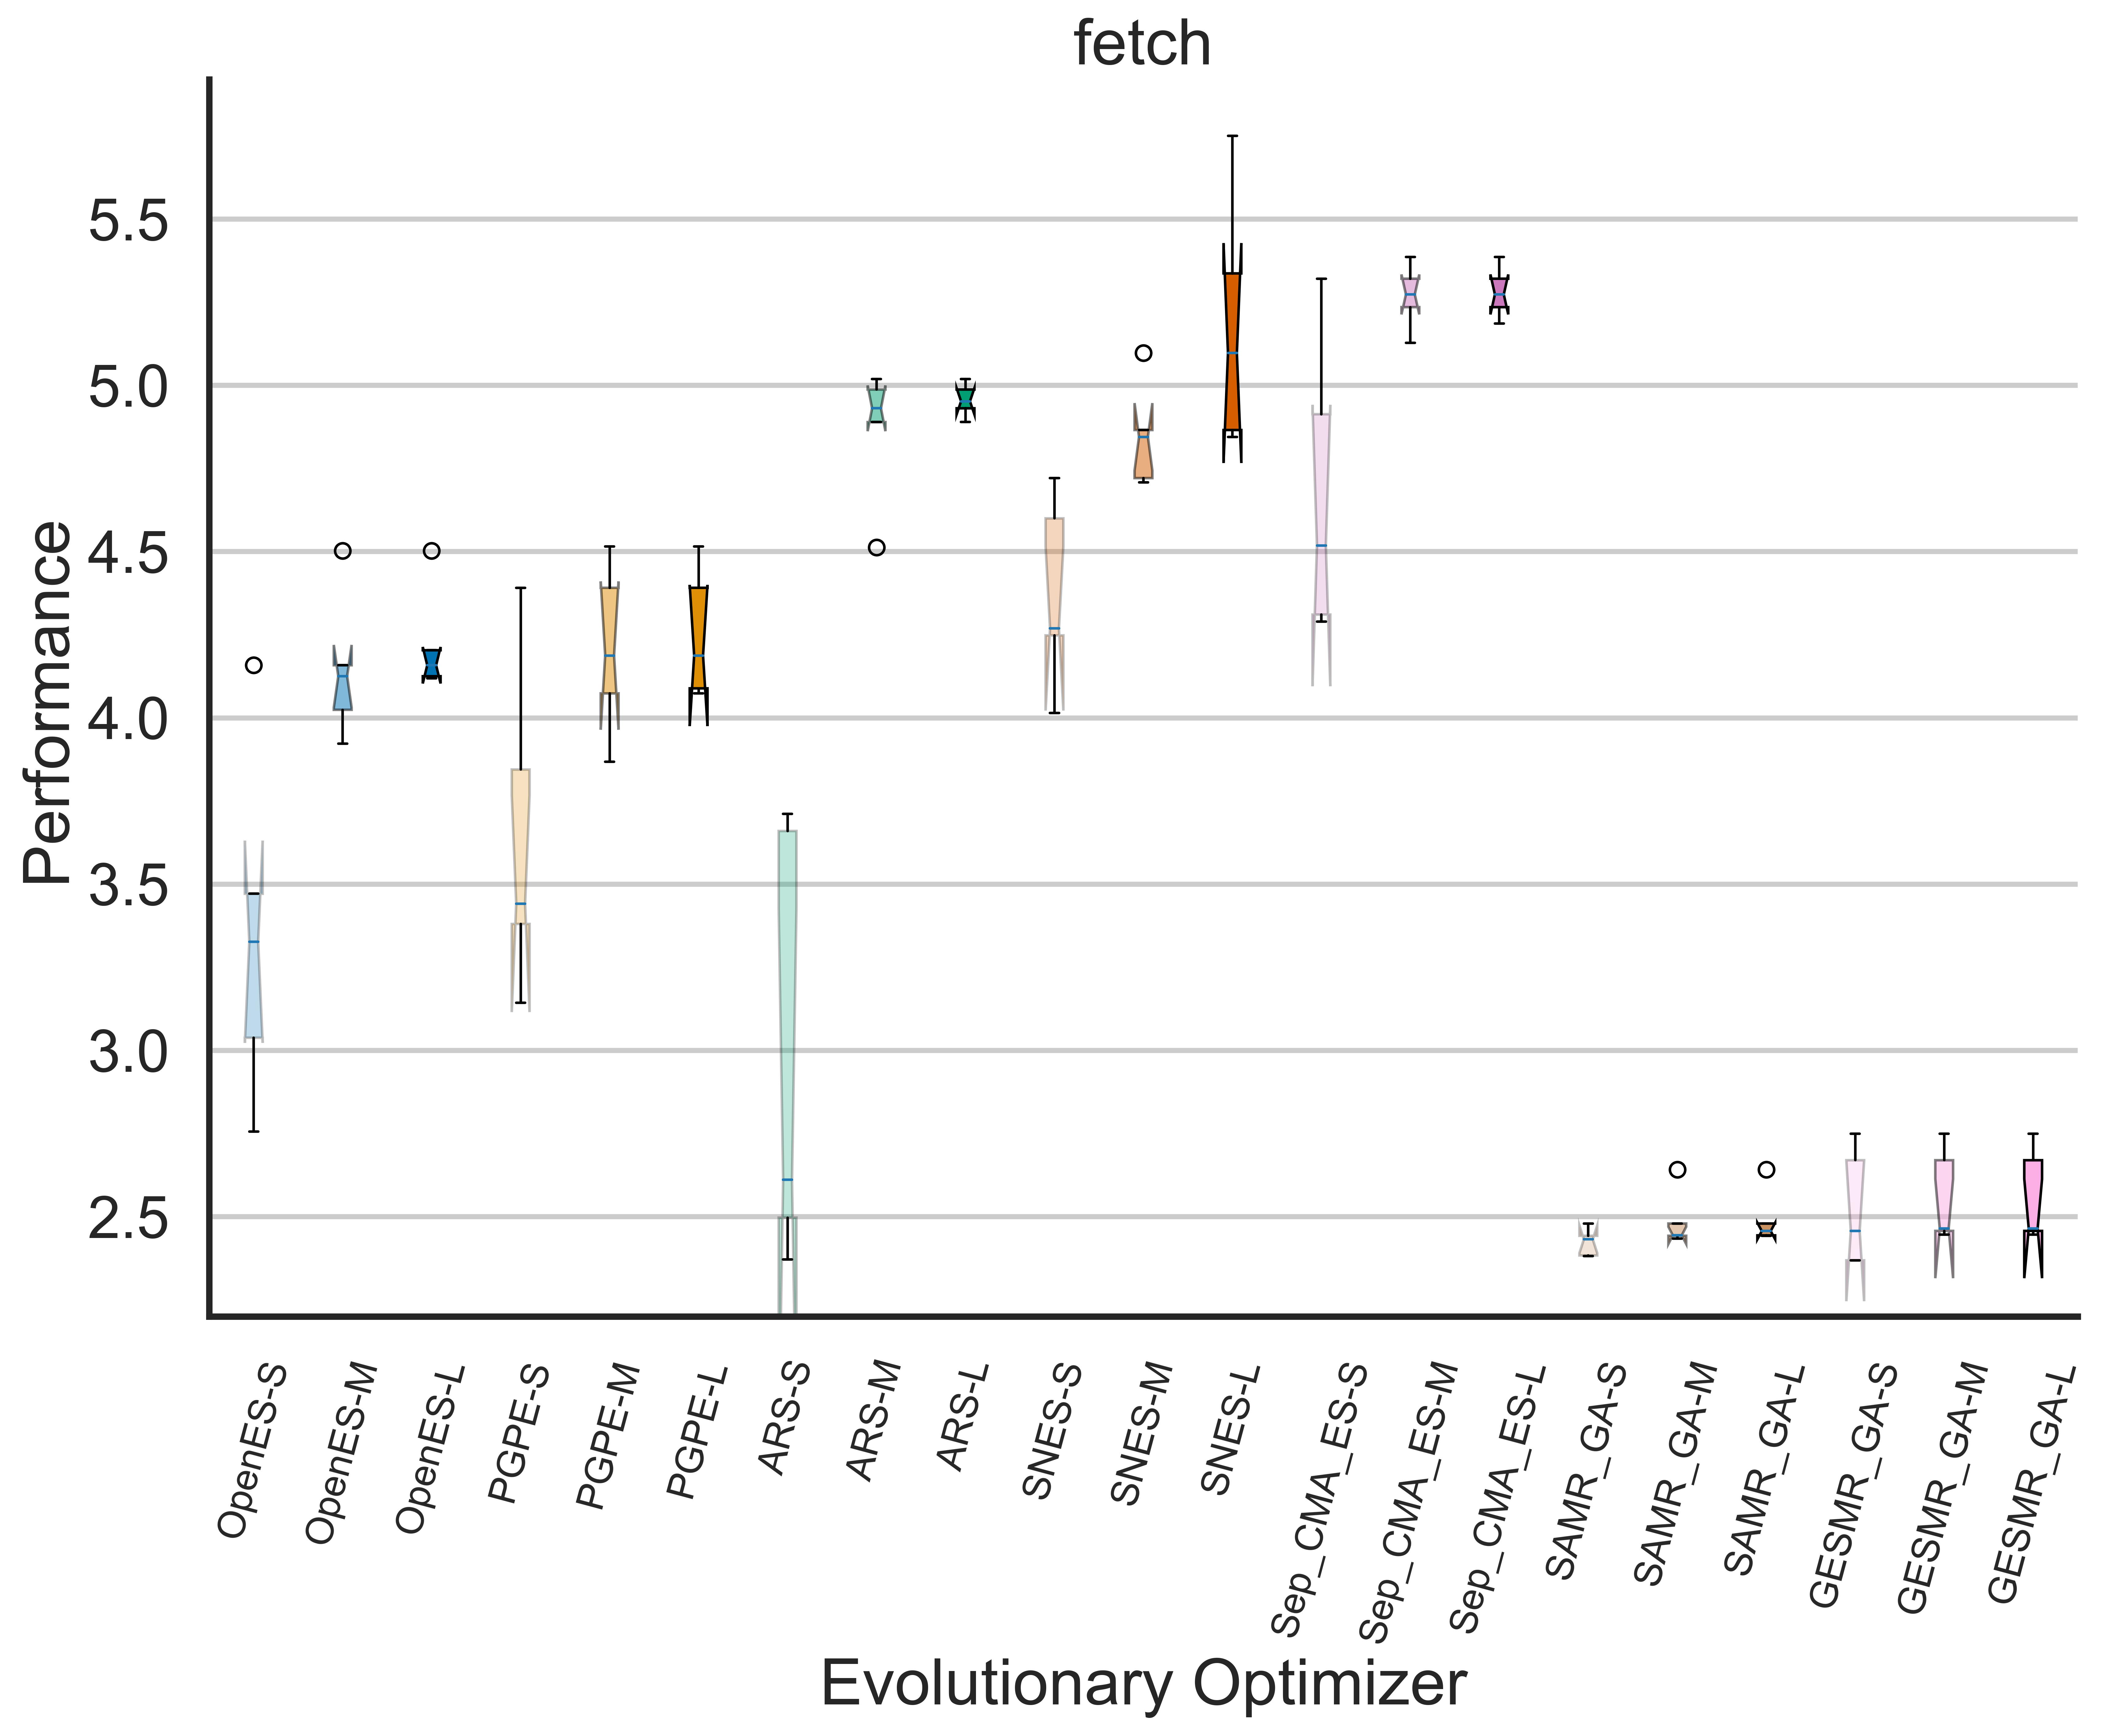

In [9]:
meta_log, hyper_log = load_result_logs("../experiments/search/fetch")
fig, axs = plt.subplots(1, 1, figsize=(12, 10))
env_name = "fetch"

env_results = {}
for strategy in strategy_names:
    env_results[strategy] = filter_log(hyper_log, meta_log,
                                       env_name, strategy, metric)

plot_sensitivity(env_results, fig, axs,
                 title=env_name,
                 plot_ylabel=True,
                 plot_xlabel=True,
                 colors=colors,
                 top_k=5)
fig.tight_layout()

### Load Hyper & Meta-Log

In [2]:
meta_log, hyper_log = load_result_logs("experiments/brax_swish")

env_names = hyper_log.env_name.unique()
strategy_names = hyper_log.strategy_name.unique()

hyper_log

/Users/rob/anaconda3/envs/mle-toolbox/lib/python3.9/site-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


       env_name strategy_name   time_elapsed       run_id  test_eval_perf                                          log_paths                      experiment_dir                                       config_fname                                         model_ckpt  seeds model_type                                          log_fname
0           ant        OpenES  367854.018832   b_1_eval_0     3703.541992  experiments/brax_swish/b_1_eval_0/logs/log_see...   experiments/brax_swish/b_1_eval_0  experiments/brax_swish/b_1_eval_0/b_1_eval_0.yaml  experiments/brax_swish/b_1_eval_0/models/final...      0        jax  experiments/brax_swish/b_1_eval_0/logs/b_1_eva...
1           ant          SNES  367854.018832   b_1_eval_1     3117.911133  experiments/brax_swish/b_1_eval_1/logs/log_see...   experiments/brax_swish/b_1_eval_1  experiments/brax_swish/b_1_eval_1/b_1_eval_1.yaml  experiments/brax_swish/b_1_eval_1/models/final...      0        jax  experiments/brax_swish/b_1_eval_1/logs/b_1_eva...
2   

In [13]:
colors = [     
          [0.97, 0.51, 0.47], # OpenAI
          [0.59, 0.99, 0.99], # SNES
          [0.99, 0.59, 0.99], # PGPE
          [0.99, 0.99, 0.59], # CMA
          ]
strategy_names = ["OpenES", "SNES", "PGPE", "Sep_CMA_ES"]
curve_labels = ["OpenES", "SNES", "PGPE", "Sep-CMA-ES"]

### Plot Hyperparameter Sensitivity

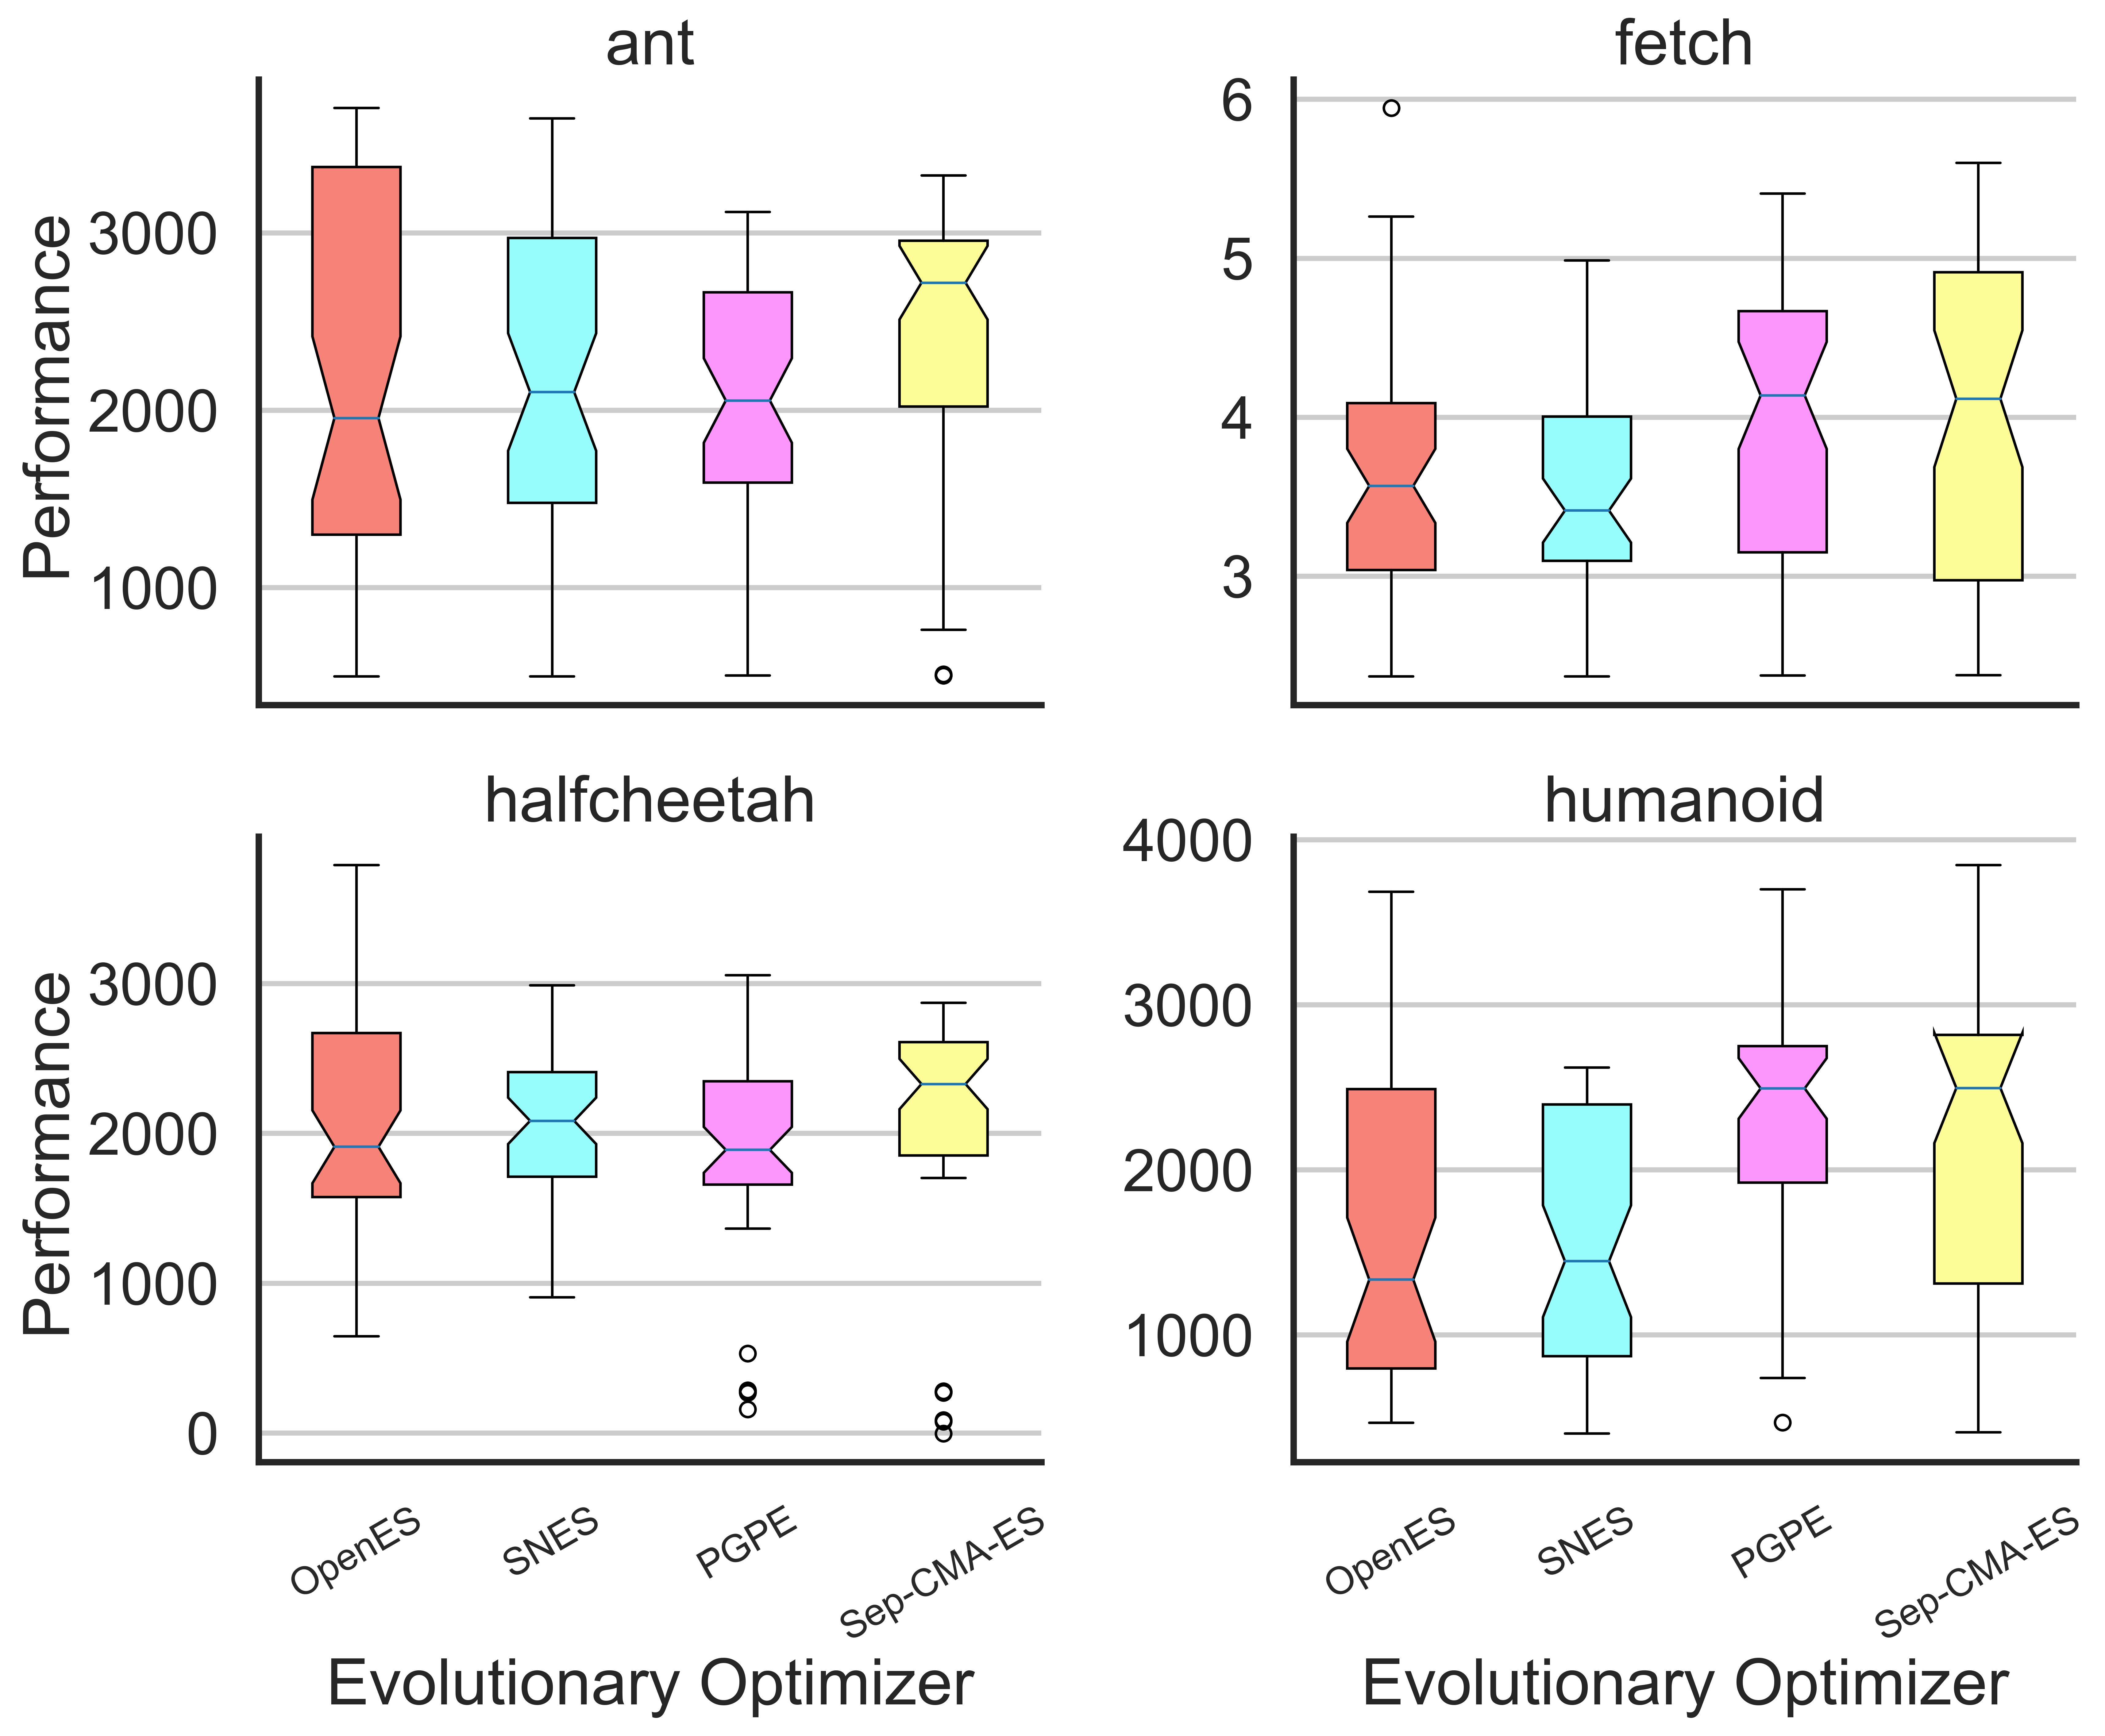

In [19]:
# fig, axs = plt.subplots(2, 2, figsize=(11, 7),)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

i = 0
for env_name, ax in zip(env_names, axs.flatten()):
    env_results = {}
    for strategy in strategy_names:
        env_results[strategy] = filter_log(hyper_log, meta_log, env_name, strategy, metric)
    env_results = dict(sorted(env_results.items()))

    plot_sensitivity(env_results, fig, ax, title=env_name,
              plot_ylabel=(i==0 or i==2),
              plot_xlabel=(i==2 or i==3),
              curve_labels=curve_labels,
              colors=colors)
    i += 1

fig.tight_layout()